In [2]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import
# ======

# essential libraries
import math
import random
from datetime import timedelta

# storing and anaysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import calmap # 설치
import folium # 설치

# color pallette
cnf, dth, rec, act = '#393e46', '#ff2e63', '#21bf73', '#fe9801' 

# converter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()   

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# for offline ploting
# ===================
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [5]:
path = '../covid'

In [6]:
os.chdir('data')
os.getcwd()

'C:\\Users\\chan\\Desktop\\covid\\data'

In [7]:
file_name_list = os.listdir()
file_name_list

['Case.csv',
 'PatientInfo.csv',
 'PatientRoute.csv',
 'Region.csv',
 'SearchTrend.csv',
 'SeoulFloating.csv',
 'temp-plot.html',
 'Time.csv',
 'TimeAge.csv',
 'TimeGender.csv',
 'TimeProvince.csv',
 'Weather.csv']

In [8]:
time = pd.read_csv('Time.csv')

In [9]:
time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


<Figure size 576x360 with 0 Axes>

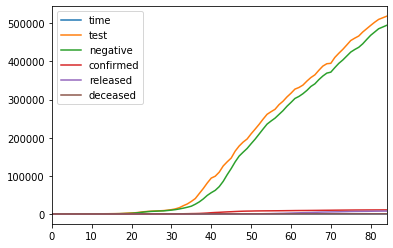

In [10]:
fig = plt.figure(figsize=(8,5))
fig.suptitle('Time')
time.plot()
plt.legend()
plt.show()

In [11]:
import plotly.graph_objects as go

fig = go.Figure() # Figure 객체 생성
fig.add_trace(go.Scatter(x=time['date'],y= time['released'],  # 그래프 하나씩 그리는 것
             mode='lines+markers', name='released'))
fig.add_trace(go.Scatter(x=time['date'],y= time['confirmed'],
             mode='lines+markers', name='confirmed'))
fig.add_trace(go.Scatter(x=time['date'],y= time['deceased'],
             mode='lines+markers', name='deceased'))

# layout 전체 그래프 틀 만들어주는 것
# <b> 볼드체 글쓰기
# color : 복사해서 구글에 치면 색깔 조절해서 해당 HEX가져올 수 있음
# family : 글씨체 > 지원되는 글씨체가 많이는 없는듯
fig.update_layout(title='<b>시간에 따른 확진자 추이</b>',
                   xaxis_title='Month',
                   yaxis_title='Number',
                 font=dict(size=18,color='#60606e',family='Franklin Gothic' ))
# iplot(fig)
fig.show()

<Figure size 576x360 with 0 Axes>

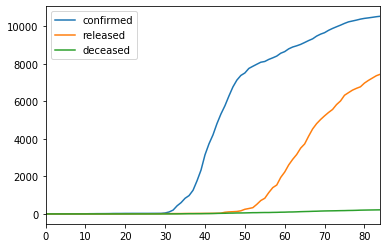

In [12]:
# matplotlib 버전
fig = plt.figure(figsize=(8,5))
fig.suptitle('Time')
time[['confirmed','released','deceased']].plot()
plt.legend()
plt.show()

In [13]:
# px.line으로 데이터 plotly에 맞는 데이터 그리고 가져다 쓸수도 있는듯
# 정확히는 모르겠음

fig_1 = px.line(time, x='date', y='negative', color_discrete_sequence=[dth])
fig_2 = px.line(time, x='date', y='test', color_discrete_sequence=[rec])

fig = make_subplots(rows=1, cols=1, shared_xaxes=True)
fig.add_trace(fig_1['data'][0])
fig.add_trace(fig_2['data'][0])

fig.update_layout(title='<b>검사자 수와 음성판정자 수</b>',
                   xaxis_title='Month',
                   yaxis_title='Number',
                 font=dict(size=18,color='#60606e',family='Franklin Gothic' ))
fig.show()

In [14]:
fig = make_subplots(rows=1, cols=1, shared_xaxes=True)
fig.add_trace(go.Scatter(x=time['date'],y= time['test']-time['negative'],
             mode='lines+markers', name='confirmed'))
fig.show()

"""
우한 바이러스 첫등장 11월14일 from 예언 ㅋㅋㅋ
우한지역 첫 확진자 발생 12월1일
국내 첫 확진자 1월 21일
대구 신천지 첫 확진자 2월17일 (31번)
"""

'\n우한 바이러스 첫등장 11월14일 from 예언 ㅋㅋㅋ\n우한지역 첫 확진자 발생 12월1일\n국내 첫 확진자 1월 21일\n대구 신천지 첫 확진자 2월17일 (31번)\n'

In [18]:
time.index = time.date
time_df=time.drop(['date','time'],axis=1,errors='ignore')

In [19]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=time['date'],y= time['released'],
             mode='lines+markers', name='released'))
fig.add_trace(go.Scatter(x=time['date'],y= time['confirmed'],
             mode='lines+markers', name='confirmed'))
fig.add_trace(go.Scatter(x=time['date'],y= time['deceased'],
             mode='lines+markers', name='deceased'))
fig.add_trace(go.Scatter(x=time['date'],y= time['confirmed']-time['released'],
             mode='lines+markers', name='isolated'))

# xaxes : 아래 네모 박스 시간단위로 하는 것 만들어주는 것
fig.update_xaxes(rangeslider_visible=True)

fig.update_layout(title='<b>시간에 따른 확진자 추이</b>',
                   xaxis_title='Month',
                   yaxis_title='Number',
                 font=dict(size=18,color='#60606e',family='Franklin Gothic' ))

# xaxes : 구조 조절하는 것
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=2, label="2m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

확진자가 급속하게 먼저 늘어나고 이후 완치된 사람들이 늘어감
확진자 증가 속도가 감소하면서 전체적인 숫자가 줄어드는 것을 확인할 수 있음

In [20]:
timeAge = pd.read_csv('timeAge.csv')
timeAge

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1
...,...,...,...,...,...
382,2020-04-13,0,40s,1401,3
383,2020-04-13,0,50s,1932,14
384,2020-04-13,0,60s,1335,32
385,2020-04-13,0,70s,698,64


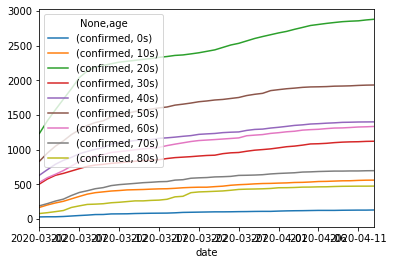

In [21]:
table = timeAge.pivot_table(index = ['date'],columns=['age'], aggfunc=sum)
table[['confirmed']].plot()

In [22]:
timeAge_Date = timeAge.pivot_table(index = ['date'],columns=['age'], aggfunc=sum)
timeAge_Date['confirmed'].head()

age,0s,10s,20s,30s,40s,50s,60s,70s,80s
date,,,,,,,,,
2020-03-02,32,169,1235,506,633,834,530,192,81
2020-03-03,34,204,1417,578,713,952,597,224,93
2020-03-04,34,233,1575,631,790,1051,646,260,108
2020-03-05,38,257,1727,659,847,1127,699,288,124
2020-03-06,45,292,1877,693,889,1217,763,340,168


In [25]:
fig = px.bar(timeAge, x='date', y='confirmed',
             hover_data=['age'], color='age', )
fig.show()

In [26]:
fig_1 = px.line(time, x='date', y='negative', color_discrete_sequence=[dth])
fig_2 = px.line(time, x='date', y='test', color_discrete_sequence=[rec])

fig = make_subplots(rows=1, cols=1, shared_xaxes=True)
fig.add_trace(fig_1['data'][0])
fig.add_trace(fig_2['data'][0])

fig.update_layout(title='<b>검사자 수와 음성판정자 수</b>',
                   xaxis_title='Month',
                   yaxis_title='Number',
                 font=dict(size=18,color='#60606e',family='Franklin Gothic' ))
fig.show()

In [27]:
# px쓰면 조금 더 간결하게 전체 여러 데이터 다룰 수 있는듯
# 하지만 maker : 라인에 점 찍혀있는 것을 할 수 없는 것 같음

fig = px.line(timeAge, x='date', y='confirmed',
              hover_data=['age'], color='age')

fig.update_layout(title='<b>연령별 확진자 수</b>',
                   xaxis_title='Month',
                   yaxis_title='Number',
                 font=dict(size=18,color='#60606e',family='Franklin Gothic' ))

fig.show()

In [28]:
timeAge_Date = timeAge.pivot_table(index = ['date'],columns=['age'], aggfunc=sum)
timeAge_Date['confirmed'].head()

import plotly.express as px
timeAge_Date['confirmed']

fig = go.Figure()
for col in timeAge_Date['confirmed'].columns:
    fig.add_trace(go.Scatter(x=timeAge_Date.index,y= timeAge_Date['confirmed'][col],
                 mode='lines+markers', name=col))
# ... #
fig.update_layout(title='<b>연령별 확진자 추이</b>',
                   xaxis_title='Month',
                   yaxis_title='Number',
                 font=dict(size=18,color='#60606e',family='Franklin Gothic' ))

fig.show()

> 의외로 확진자는 20대가 많다는 것을 볼 수 있음

> 70, 80대 확진자 숫자는 상당히 낮은편

> 10대는 확실히 돌아다니지 않고 학교 집 학원 이후 격리처리 집이라서 괜찮은듯

> 20대 일하던 여행하던 놀러다니던 돌아다니는 경우가 많아서 확실히 많음

> 50대는 왜 많은지 궁금함 관련 연구 필요할듯 은퇴자 or 주부 or 이유가 있을듯


In [29]:
timeAge_Date = timeAge.pivot_table(index = ['date'],columns=['age'], aggfunc=sum)
timeAge_Date['deceased'].head()

import plotly.express as px
timeAge_Date['deceased']

fig = go.Figure()
for col in timeAge_Date['deceased'].columns:
    fig.add_trace(go.Scatter(x=timeAge_Date.index,y= timeAge_Date['deceased'][col],
                 mode='lines+markers', name=col))
# ... #
fig.update_layout(title='<b>연령별 사망자 추이</b>',
                   xaxis_title='Month',
                   yaxis_title='Number',
                 font=dict(size=18,color='#60606e',family='Franklin Gothic' ))

fig.show()

나이가 많을 수록 사망자 수가 매우 높음
> 20대가 확진자 수가 월등히 많음에도 사망자 숫자 자체가 80, 70대에서 더 많은 것은
> 나이에 따른 사망확률이 매우 높음을 알 수 있다.

In [30]:
timeGender = pd.read_csv('timeGender.csv')
timeGender

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20
...,...,...,...,...,...
81,2020-04-11,0,female,6265,100
82,2020-04-12,0,male,4229,113
83,2020-04-12,0,female,6283,101
84,2020-04-13,0,male,4243,115


In [93]:
Gender_Date = timeGender.pivot_table(index = ['date'],columns=['sex'], aggfunc=sum)
Gender_Confirmed = Gender_Date['confirmed']
Gender_Deceased = Gender_Date['deceased']

ax3 = px.line(Gender_Confirmed, x=Gender_Confirmed.index, y=Gender_Deceased['female'],
             color_discrete_sequence=['#ff0d5f'], labels='Female')
ax4 = px.line(Gender_Confirmed, x=Gender_Confirmed.index, y=Gender_Deceased['male'],
             color_discrete_sequence=['#3370ff'], labels='Male')

fig = go.Figure()
fig = make_subplots(rows=1, cols=2,
                    horizontal_spacing= 0.08,
                   subplot_titles=('<b>남여 확진자 수</b>','<b>남여 사망자 수</b>'))

fig.add_trace(go.Scatter(x=Gender_Confirmed.index, y=Gender_Confirmed['male'],
                 mode='lines', name="Male"), row=1, col=1)
fig.add_trace(go.Scatter(x=Gender_Confirmed.index, y=Gender_Confirmed['female'],
                 mode='lines', name="Female"), row=1, col=1)

fig.add_trace(go.Scatter(x=Gender_Deceased.index, y=Gender_Deceased['male'],
                 mode='lines', name="Male", showlegend=False, line=dict(color='#3370ff')), row=1, col=2)
fig.add_trace(go.Scatter(x=Gender_Deceased.index, y=Gender_Deceased['female'],
                 mode='lines', name="Female", showlegend=False, line=dict(color='#ff0d5f')), row=1, col=2)

fig.update_layout(title='<b>성별 확진자 및 사망자 수</b>',
                   xaxis_title='Month',
                   yaxis_title='Number',
                 font=dict(size=18,color='#60606e',family='Franklin Gothic' ),
                 showlegend=True)
fig.show()

In [138]:
fig = go.Figure()
fig = make_subplots(rows=1, cols=1, shared_xaxes=True)
fig.add_trace(go.Scatter(x=time['date'], y=time['negative'],
                        name='Negative', line=dict(color='#28ede0',width=3.5)))
fig.add_trace(go.Scatter(x=time['date'], y=time['test'],
                         name='Test', line=dict(color='#ffca45',width=3.5)))

fig.update_layout(title='<b>검사자 수와 음성판정자 수</b>',
                   xaxis_title='Month',
                   yaxis_title='Number',
                 font=dict(size=18,color='#60606e',family='Franklin Gothic' ))
fig.show()

여자 감염자 수가 높은 반면, 사망자 수는 크게 차이나지는 않음

In [109]:
timeProvince = pd.read_csv('TimeProvince.csv',)
timeProvince
timeProvince.columns

Index(['date', 'time', 'province', 'confirmed', 'released', 'deceased'], dtype='object')

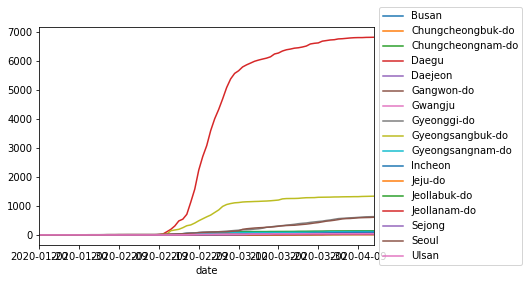

In [113]:
# 지역별 확진자 증가
Province_Date = timeProvince.pivot_table(index = ['date'], columns=['province'])
Province_Date['confirmed'].plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [197]:
many = Province_Date['confirmed'].iloc[-1].sort_values(ascending=False)
top = many[:7]
top

province
Daegu                6819
Gyeongsangbuk-do     1337
Gyeonggi-do           631
Seoul                 610
Chungcheongnam-do     139
Busan                 126
Gyeongsangnam-do      115
Name: 2020-04-13, dtype: int64

In [206]:
Province_Date.index[20:]

Index(['2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
       '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
       '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23',
       '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
       '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
       '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
       '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14',
       '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19',
       '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
       '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
       '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03',
       '2020-04-04', '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08',
       '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13']

In [211]:
# fig = make_subplots(rows=1, cols=1, subplot_titles=('<b>전지역 확진자 추이</b>','<b>Top 5 확진자 수 지역</b>'))
fig = go.Figure()

# for col in Province_Date['confirmed'].columns:
#     fig.add_trace(go.Scatter(x=Province_Date.index,y= Province_Date['confirmed'][col], mode='lines', name=col),row=1, col=1)

for col in list(top.index):
    fig.add_trace(go.Scatter(x=Province_Date.index[20:],y= Province_Date['confirmed'].ix[20:,col],
                 mode='lines', name=col, showlegend=True))
    
fig.update_layout(title='<b>확진자 상위 7개 지역의 추이</b>',
                   xaxis_title='Month',
                   yaxis_title='Number', 
                  font=dict(size=18,color='#60606e',family='Franklin Gothic'),
#                    width=1500,
#                     height=1500,
#                     margin=dict(
#                         l=50, r=50, b=50, t=100 ,pad=4 ),
#                   paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)'
                 )
fig.show()

https://plotly.com/python/mixed-subplots/

아 이런거 무조건 넣어야된다!!!!

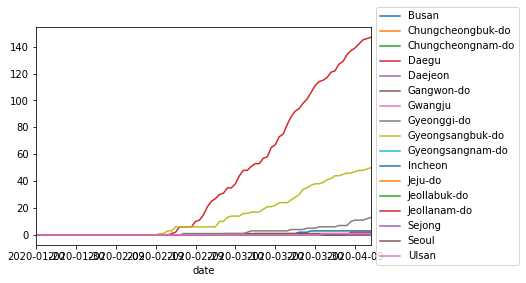

In [130]:
# 지역별 사망자 증가
table = timeProvince.pivot_table(index = ['date'], columns=['province'])
table['deceased'].plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# 확실히 사망자 대구가 많음
# 나중에 그래프 그릴때 지역별 색깔 통일해줘야겠다

In [229]:
DEFAULT_PLOTLY_COLORS=['rgb(31, 119, 180)', 'rgb(255, 127, 14)',
                       'rgb(44, 160, 44)', 'rgb(214, 39, 40)',
                       'rgb(148, 103, 189)', 'rgb(140, 86, 75)',
                       'rgb(227, 119, 194)', 'rgb(127, 127, 127)',
                       'rgb(188, 189, 34)', 'rgb(23, 190, 207)']

In [244]:
fig = make_subplots(rows=2, cols=1, subplot_titles=('<b>지역별 확진자 추이</b>','<b>지역별 사망자 추이</b>'))
                    
for i, col in enumerate(list(top.index)):
    fig.add_trace(go.Scatter(x=Province_Date.index[20:],
                             y= Province_Date['confirmed'].ix[20:,col],
                             mode='lines', name=col,
                            line=dict(color=DEFAULT_PLOTLY_COLORS[i], width=2)),row=1, col=1)

for i, col in enumerate(list(top.index)):
    fig.add_trace(go.Scatter(x=Province_Date.index[20:],
                             y= Province_Date['deceased'].ix[20:,col],
                             mode='lines', name=col, showlegend=False,
                             line=dict(color=DEFAULT_PLOTLY_COLORS[i], width=2)), row=2, col=1)
    

fig.update_xaxes(title_text="Month", row=1, col=1)
fig.update_xaxes(title_text="Month", row=2, col=1)
fig.update_yaxes(title_text="Number", row=1, col=1)
fig.update_yaxes(title_text="Number", row=2, col=1)

fig.update_layout(title='<b>확진자 상위 7개 지역의 추이</b>', height=800,
                  font=dict(size=18,color='#60606e',family='Franklin Gothic'))
for i in fig['layout']['annotations']:
    i['font'] = dict(size=18)
fig.show()

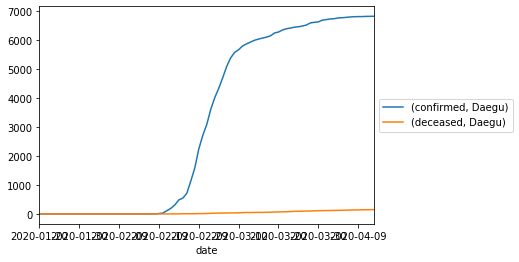

In [137]:
table[[('confirmed','Daegu'),('deceased','Daegu')]].plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [155]:
def percentage(a,b):
    return b*100/(a+b)

In [156]:
c, d = time[['confirmed','deceased']].sum()
percentage(c, d) # 전체 확진자 수 대바 사망자 비율 : 1.3139%

1.3139356892450709

In [157]:
a, b = table[[('confirmed','Daegu'),('deceased','Daegu')]].sum()
percentage(a, b) # 대구의 사망자 비율 : 1.3097 거의 유사함

1.3097500790429084

In [165]:
# 지역별로 보면
provinces = timeProvince['province'].unique()
for province in provinces:
    conv, decs = table[[('confirmed',province), ('deceased',province)]].sum()
    print(f'{province} 사망률 : {percentage(conv, decs):#.2f},\t\t 확진자수 : {conv:#.2f} ')
# 지역별 평균 연령이랑 엮어볼 수 있을 듯

Seoul 사망률 : 0.08,		 확진자수 : 15531.00 
Busan 사망률 : 1.23,		 확진자수 : 5202.00 
Daegu 사망률 : 1.31,		 확진자수 : 271563.00 
Incheon 사망률 : 0.00,		 확진자수 : 2009.00 
Gwangju 사망률 : 0.00,		 확진자수 : 929.00 
Daejeon 사망률 : 0.00,		 확진자수 : 1234.00 
Ulsan 사망률 : 0.86,		 확진자수 : 1502.00 
Sejong 사망률 : 0.00,		 확진자수 : 1448.00 
Gyeonggi-do 사망률 : 1.21,		 확진자수 : 16099.00 
Gangwon-do 사망률 : 2.44,		 확진자수 : 1517.00 
Chungcheongbuk-do 사망률 : 0.00,		 확진자수 : 1527.00 
Chungcheongnam-do 사망률 : 0.00,		 확진자수 : 5276.00 
Jeollabuk-do 사망률 : 0.00,		 확진자수 : 525.00 
Jeollanam-do 사망률 : 0.00,		 확진자수 : 367.00 
Gyeongsangbuk-do 사망률 : 2.25,		 확진자수 : 53987.00 
Gyeongsangnam-do 사망률 : 0.00,		 확진자수 : 4299.00 
Jeju-do 사망률 : 0.00,		 확진자수 : 303.00 


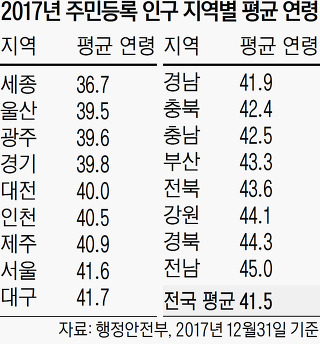

전남과 경북이 평균연령이 매우 높은 편임
전남의 경우는 확진자 수 자체가 매우 적어서 관리가 잘 되나? 일단 확진자가 적으니 사망자도 잘 안나옴
경북은 확진자 수 매우 높음 >> 이 이유를 연령과 연관지어 생각해 볼 수 있을 듯
2번째로 평균연령이 높은 곳

### 사망 원인에 대해서 알아봐야겠다는 의문점이생감

http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1IN1603
통계데이터 / 지역별 나이랑 성별 합쳐서 볼 수 있음

https://coronaboard.kr/
  코로나 보드 : 누가 해놓은 것 
  여기것 찾고해도 좋을듯 : 저기서 데이터 출처 적어놓은 곳에서
  전세계국가별 데이터 가져올 수 있을 것 같음

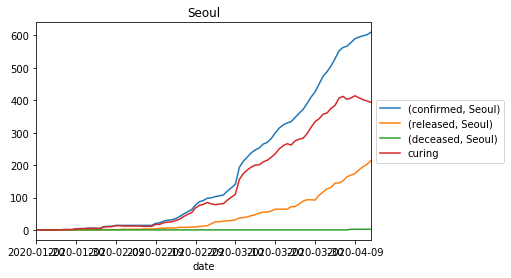

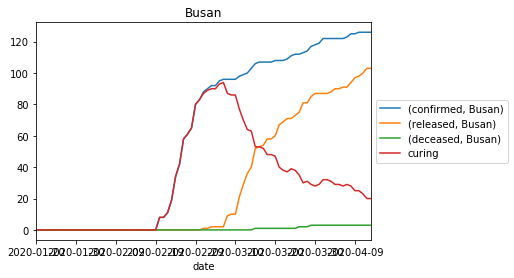

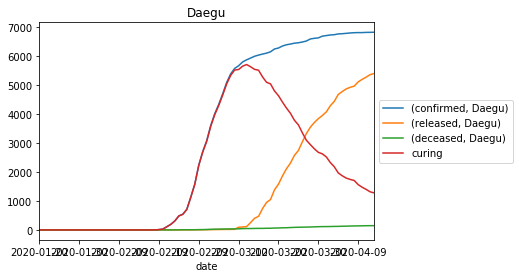

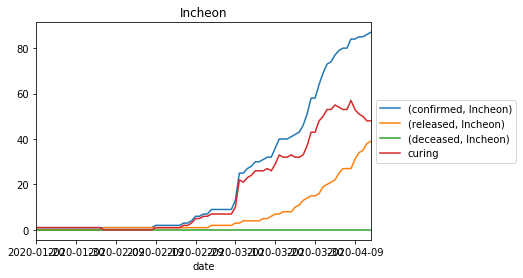

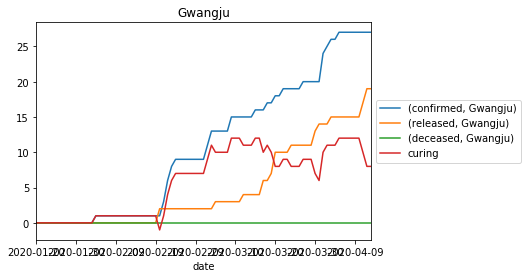

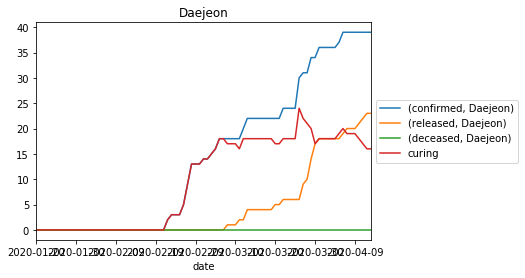

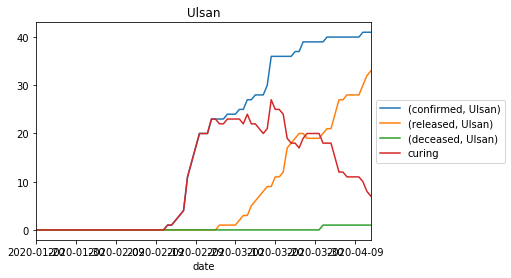

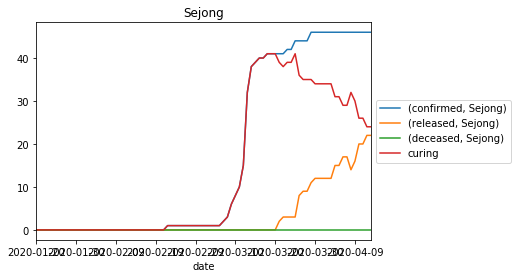

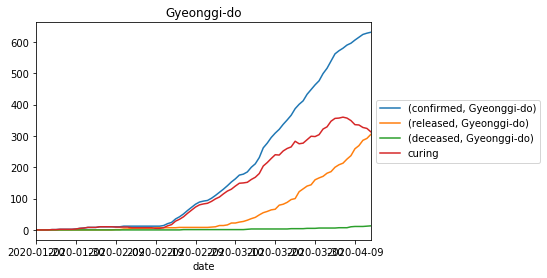

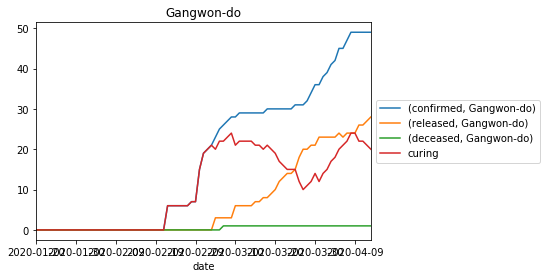

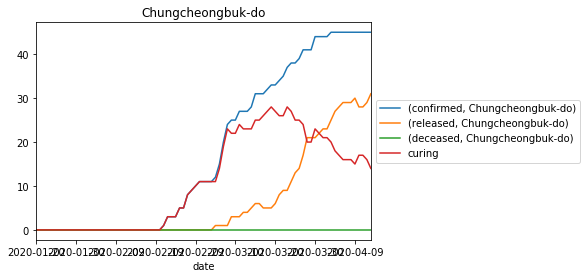

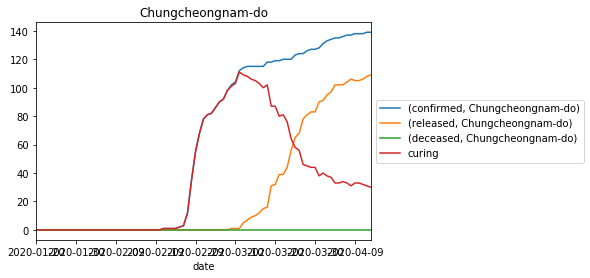

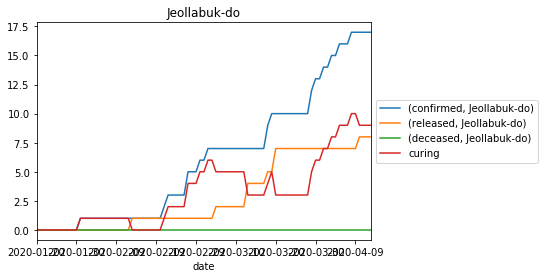

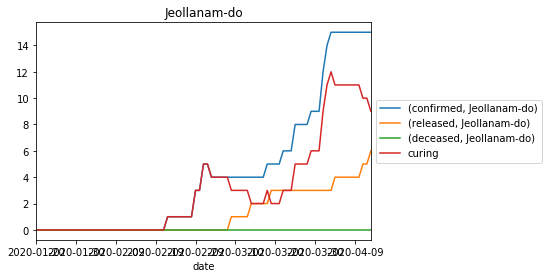

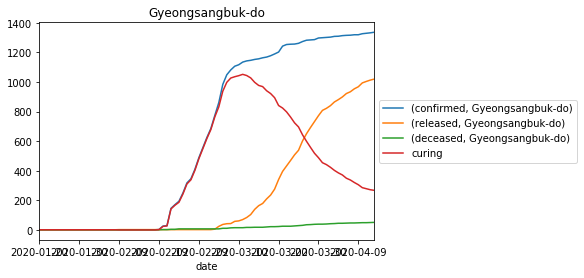

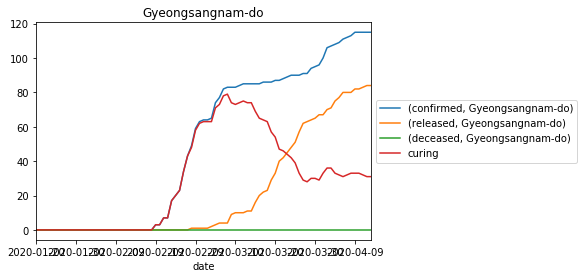

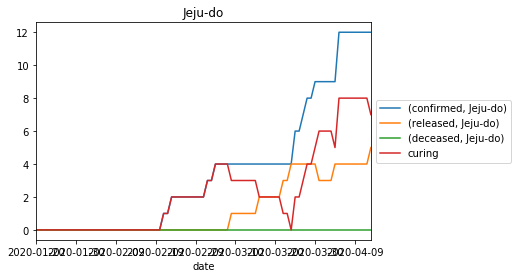

In [174]:
# 지역별로 그래프
provinces = timeProvince['province'].unique()
for province in provinces:
    table[[('confirmed',province), ('released',province), ('deceased',province)]].plot()
    (table[('confirmed',province)] - table[('released',province)] - table[('deceased',province)]).plot(label='curing')
    plt.title(province)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [169]:
timeProvince

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0
...,...,...,...,...,...,...
1440,2020-04-13,0,Jeollabuk-do,17,8,0
1441,2020-04-13,0,Jeollanam-do,15,6,0
1442,2020-04-13,0,Gyeongsangbuk-do,1337,1020,50
1443,2020-04-13,0,Gyeongsangnam-do,115,84,0


In [178]:
weather = pd.read_csv('Weather.csv')
weather

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,180.0,83.9
...,...,...,...,...,...,...,...,...,...,...
25018,50000,Jeollabuk-do,2020-04-12,8.7,3.2,15.5,2.0,6.0,110.0,71.6
25019,51000,Jeollanam-do,2020-04-12,9.6,7.7,11.5,1.5,11.2,20.0,69.4
25020,60000,Gyeongsangbuk-do,2020-04-12,9.6,5.8,15.2,2.3,11.5,50.0,76.3
25021,61000,Gyeongsangnam-do,2020-04-12,8.8,6.4,13.0,6.9,7.0,50.0,73.3


In [189]:
# 온도는 어떻게 분석해야할지 모르겠네 ㅇㅅㅇ ;;;;
# 온도랑 1도 상관 없어보이는데 ...흠;;;
# 다른 많이 걸렸던 질병 데이터 구해서 날씨 온도에 따라 변한 것 보면서 비교한 다면 괜찮을 수 있는데
# 그게 아니면 그냥 여기서는 좀 애매해 보임

# 대구에 대해서
weather[weather['province']=='Daegu'].loc[:,'date':]

,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
2,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
18,2016-01-02,3.0,-2.7,9.9,0.0,2.6,250.0,74.8
34,2016-01-03,4.9,-2.3,13.9,0.0,2.3,110.0,77.0
50,2016-01-04,5.8,1.1,11.4,0.0,5.3,290.0,58.1
66,2016-01-05,2.9,0.9,5.9,0.0,4.0,270.0,29.4
...,...,...,...,...,...,...,...,...
24945,2020-04-08,12.2,7.1,18.8,0.0,6.4,290.0,45.0
24961,2020-04-09,10.3,3.0,17.5,0.0,6.4,110.0,55.5
24977,2020-04-10,11.0,8.2,15.0,0.0,4.2,140.0,60.8
24993,2020-04-11,10.6,5.8,15.2,0.1,4.0,270.0,69.3


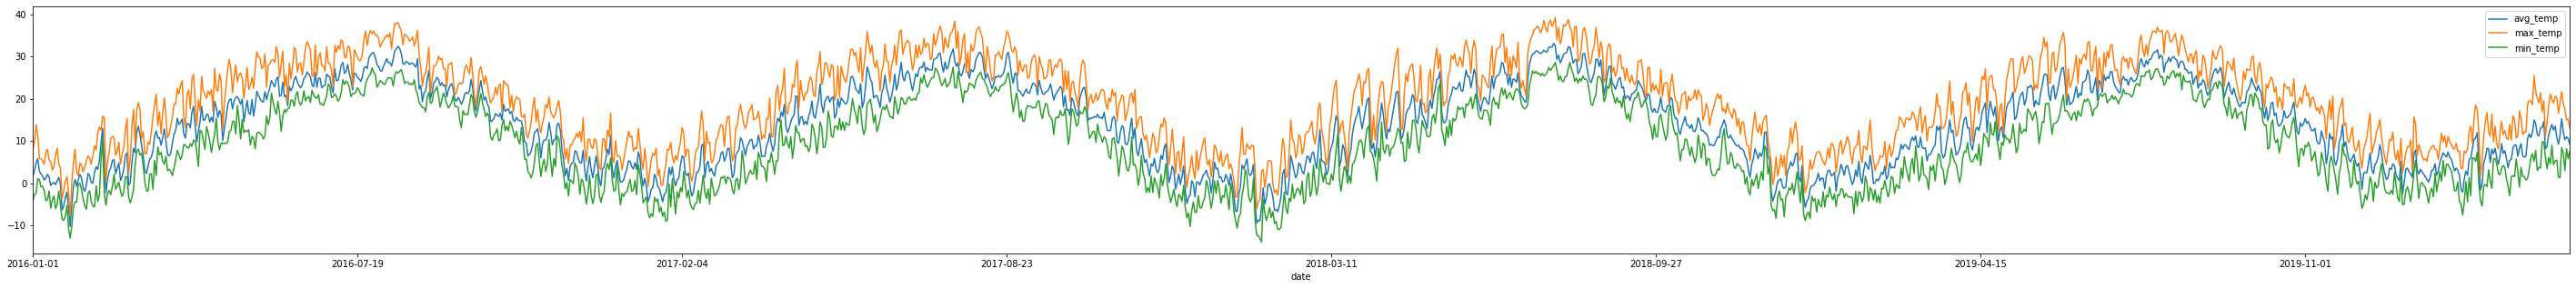

In [198]:
Dague = weather[weather['province']=='Daegu'].loc[:,'date':]
Dague.pivot_table(index='date').filter(regex='temp').plot(figsize=(50,5))

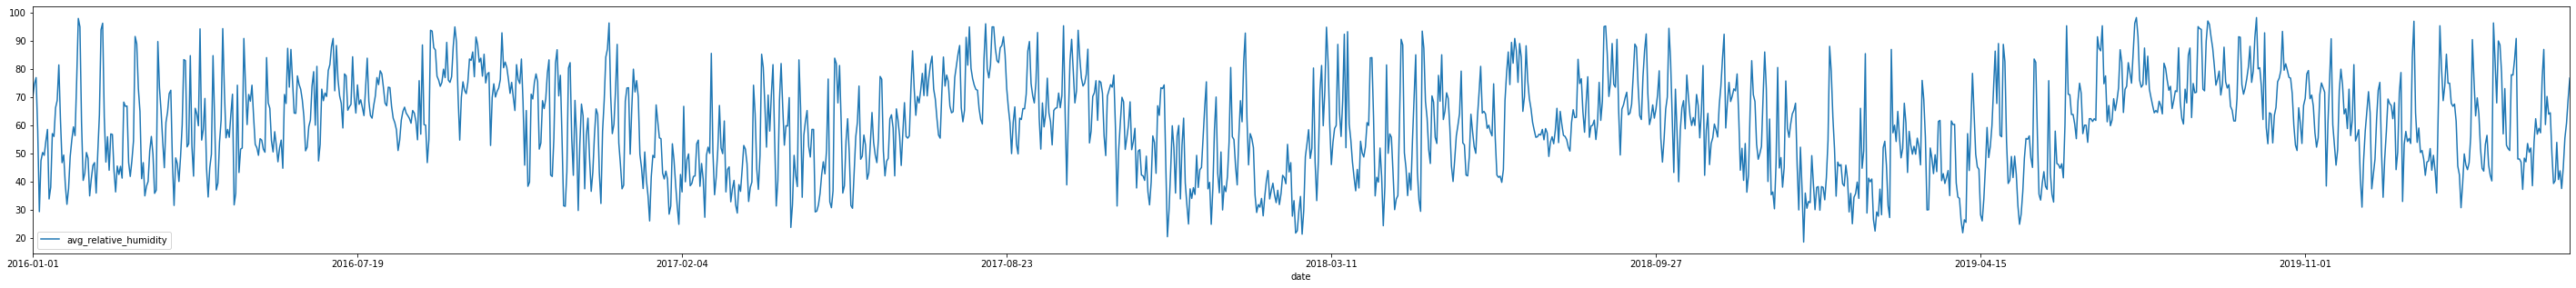

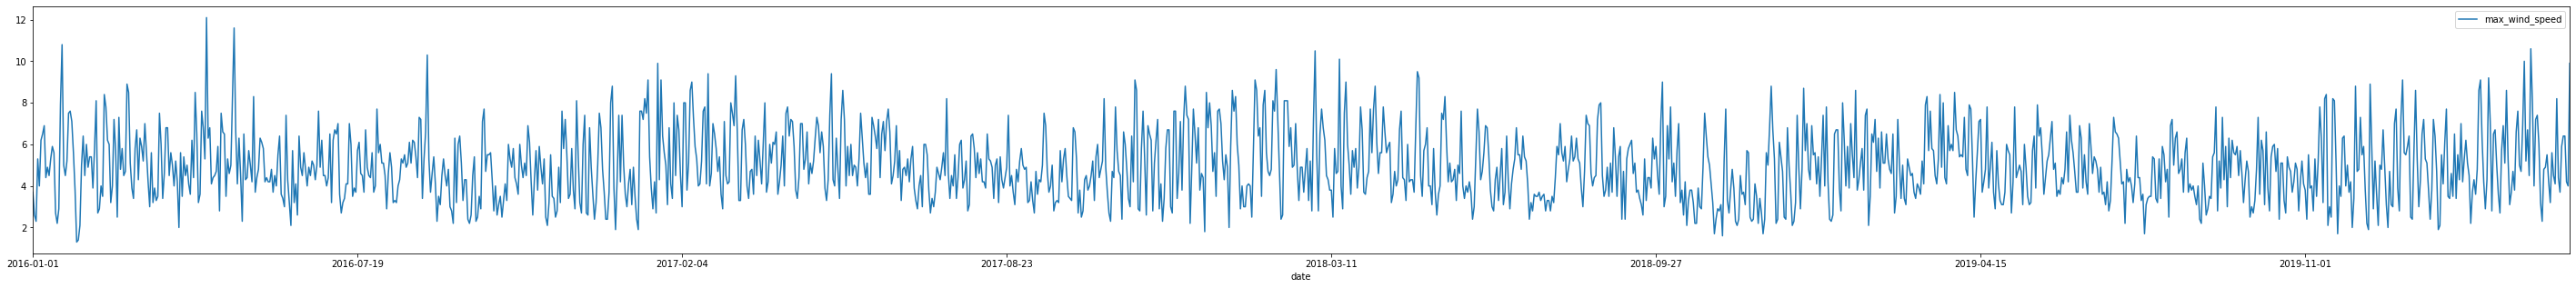

In [200]:
Dague.pivot_table(index='date').filter(regex='humidity').plot(figsize=(50,5))

Dague.pivot_table(index='date').filter(regex='wind_speed').plot(figsize=(50,5))
# 흠 애매하다 이런애들